In [369]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# MIS - Standard minimum income
#### 1. pre- processing:
Load the data,
Dealing eith mising valuse,
Unite categories
#### 2. Plots of the data
incom & expenses categoris
#### 3. Standardize per capita
Israel method & OECD method
#### 4. Calculating the MIS threshold
Connecting all minimum points
What percentage of families are below the line?

In [370]:
df = pd.read_excel("C:/Users/user/Desktop/data/df_b.xlsx")
df

,מזהה תיק,מצב משפחתי,מספר ילדים,הכנסות,הוצאות,משכנתא,ביטוח משכנתא,שכר דירה,מיסי ישוב / ועד בית,ביטוחים (למעט רכב),...,קצבת ילדים,"קצבאות נוספות (נכות, הבטחת הכנסה וכד')",סיוע בשכר דירה,מזונות,הכנסה מנכס,הכנסה נוספת,עזרה מההורים,סך סעיפי הכנסה פרטיים,תאריך התחלה,תאריך סיום
0,158,נשוי/אה,3.0,31520.0,18648.0,0.0,0.0,3500.0,400.0,0.0,...,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-13,2018-05-22
1,1129,נשוי/אה,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-15,2019-11-21
2,1581,נשוי/אה,5.0,26784.0,25856.0,0.0,0.0,0.0,840.0,892.0,...,764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-15,2021-01-09
3,1742,נשוי/אה,NaN,0.0,2674.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-04,2019-12-15
4,1808,נשוי/אה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-04-19,2017-07-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10418,84316,נשוי/אה,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-24,2019-12-24
10419,84661,גרוש/ה,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-08,2019-12-17
10420,84696,פרוד/ה,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-27,2019-12-30
10421,84998,רווק/ה,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-26,2019-12-17


## Pre-processing

In [371]:
df.columns
columns = ["id","Marital_status", "Num_children", "incom", "expenses", "mortag", "mortag_insurenc", 'Rent', "Local_taxes",
       'Insurance', 'Permanent_savings', 'Subscriptions',
       'Contributions', 'property_tax', 'water', 'electricity', 'gas',
       'oil', 'Education', 'summer_camps',
       'Car_insurance', 'Car_repairs', 'Clothing_footwear', 'Health',
       'Bank_fees',' Dental_care ','Optics', 'Vacation',
       'Judaism_Holidays', 'Gifts', 'Purchases_Services',
       'Haircut_cosmetics', 'Social_security', 'Food',
       'Public_Transport', 'Fuel_Parking', 'Phone', 'Mobile_Phone',
       'Home_repairs', 'babysitter', 'cigarettes', 'other_things',
       'Instruments_num', 'Total_Items', 'Wages_1', 'Wages_2',
       'Wages_3', 'Wages_4', 'Child_allowance',
       'Additional_benefits', 'Rent_halping', 'Alimony',
       'Income_property', 'Additional_income', 'Parental_halping', 'Total_items',
       'Start_Date', 'End_Date']
df.columns = columns

### Dealing with mising valuse

In [372]:
df["Num_children"] = df["Num_children"].fillna(0)
df["Instruments_num"] = df["Instruments_num"].fillna(0)
df["Start_Date"] = df["Start_Date"].fillna(0)
df["End_Date"] = df["End_Date"].fillna(0)

In [373]:
df.isna().sum()

id                        0
Marital_status          154
Num_children              0
incom                  3624
expenses               3624
mortag                 3624
mortag_insurenc        3625
Rent                   3624
Local_taxes            3624
Insurance              3624
Permanent_savings      3624
Subscriptions          3624
Contributions          3624
property_tax           3624
water                  3624
electricity            3624
gas                    3624
oil                    3624
Education              3624
summer_camps           3624
Car_insurance          3624
Car_repairs            3625
Clothing_footwear      3624
Health                 3624
Bank_fees              3624
 Dental_care           3624
Optics                 3624
Vacation               3624
Judaism_Holidays       3624
Gifts                  3624
Purchases_Services     3624
Haircut_cosmetics      3624
Social_security        3624
Food                   3624
Public_Transport       3624
Fuel_Parking        

In [374]:
df = df.dropna(axis=0, how='any')
df.isna().sum()

id                     0
Marital_status         0
Num_children           0
incom                  0
expenses               0
mortag                 0
mortag_insurenc        0
Rent                   0
Local_taxes            0
Insurance              0
Permanent_savings      0
Subscriptions          0
Contributions          0
property_tax           0
water                  0
electricity            0
gas                    0
oil                    0
Education              0
summer_camps           0
Car_insurance          0
Car_repairs            0
Clothing_footwear      0
Health                 0
Bank_fees              0
 Dental_care           0
Optics                 0
Vacation               0
Judaism_Holidays       0
Gifts                  0
Purchases_Services     0
Haircut_cosmetics      0
Social_security        0
Food                   0
Public_Transport       0
Fuel_Parking           0
Phone                  0
Mobile_Phone           0
Home_repairs           0
babysitter             0


In [375]:
df

,id,Marital_status,Num_children,incom,expenses,mortag,mortag_insurenc,Rent,Local_taxes,Insurance,...,Child_allowance,Additional_benefits,Rent_halping,Alimony,Income_property,Additional_income,Parental_halping,Total_items,Start_Date,End_Date
0,158,נשוי/אה,3.0,31520.0,18648.0,0.0,0.0,3500.0,400.0,0.0,...,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-13 00:00:00,2018-05-22 00:00:00
2,1581,נשוי/אה,5.0,26784.0,25856.0,0.0,0.0,0.0,840.0,892.0,...,764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-15 00:00:00,2021-01-09 00:00:00
3,1742,נשוי/אה,0.0,0.0,2674.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-04 00:00:00,2019-12-15 00:00:00
7,2548,נשוי/אה,4.0,17007.0,11021.0,0.0,0.0,2000.0,0.0,222.0,...,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-04-26 00:00:00,2019-04-07 00:00:00
8,2624,גרוש/ה,3.0,15898.0,13530.0,2047.0,75.0,0.0,100.0,302.0,...,150.0,0.0,0.0,2800.0,0.0,0.0,0.0,4500.0,2018-02-15 00:00:00,2018-11-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10404,82885,גרוש/ה,2.0,12500.0,797.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-11 00:00:00,2019-12-16 00:00:00
10407,83171,פרוד/ה,2.0,20185.0,8202.0,0.0,0.0,7200.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-02 00:00:00,2019-12-02 00:00:00
10411,83581,נשוי/אה,2.0,0.0,991.0,0.0,0.0,875.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-03 00:00:00,2019-12-05 00:00:00
10415,83807,נשוי/אה,4.0,9518.0,11716.0,3392.0,89.0,0.0,0.0,1033.0,...,101.0,2600.0,0.0,0.0,2400.0,0.0,400.0,1485.0,2019-10-24 00:00:00,2019-11-21 00:00:00


### Filtering the data

In [376]:
list = df[(df.incom < 2000) | (df.incom > 50000) | (df.expenses < 2000) | (df.expenses > 50000) ].index
print(list)
df = df.drop(list)
df = df.reset_index()
df

Int64Index([    3,    13,    19,    28,    30,    31,    34,    37,    39,
               41,
            ...
            10372, 10378, 10379, 10383, 10384, 10386, 10394, 10402, 10404,
            10411],
           dtype='int64', length=1909)


,index,id,Marital_status,Num_children,incom,expenses,mortag,mortag_insurenc,Rent,Local_taxes,...,Child_allowance,Additional_benefits,Rent_halping,Alimony,Income_property,Additional_income,Parental_halping,Total_items,Start_Date,End_Date
0,0,158,נשוי/אה,3.0,31520.0,18648.0,0.0,0.0,3500.0,400.0,...,320.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-12-13 00:00:00,2018-05-22 00:00:00
1,2,1581,נשוי/אה,5.0,26784.0,25856.0,0.0,0.0,0.0,840.0,...,764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-06-15 00:00:00,2021-01-09 00:00:00
2,7,2548,נשוי/אה,4.0,17007.0,11021.0,0.0,0.0,2000.0,0.0,...,202.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-04-26 00:00:00,2019-04-07 00:00:00
3,8,2624,גרוש/ה,3.0,15898.0,13530.0,2047.0,75.0,0.0,100.0,...,150.0,0.0,0.0,2800.0,0.0,0.0,0.0,4500.0,2018-02-15 00:00:00,2018-11-12 00:00:00
4,9,2671,גרוש/ה,4.0,12506.0,9839.0,0.0,0.0,0.0,70.0,...,339.0,2850.0,0.0,1700.0,0.0,0.0,0.0,7617.0,2017-11-20 00:00:00,2018-06-14 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,10396,82636,גרוש/ה,1.0,9520.0,3273.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1500.0,0.0,0.0,0.0,0.0,2019-10-27 00:00:00,2019-12-17 00:00:00
4802,10401,82852,נשוי/אה,8.0,21676.0,25461.0,4501.0,340.0,0.0,0.0,...,572.0,0.0,0.0,0.0,0.0,0.0,0.0,7000.0,2019-09-19 00:00:00,2019-12-24 00:00:00
4803,10407,83171,פרוד/ה,2.0,20185.0,8202.0,0.0,0.0,7200.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-12-02 00:00:00,2019-12-02 00:00:00
4804,10415,83807,נשוי/אה,4.0,9518.0,11716.0,3392.0,89.0,0.0,0.0,...,101.0,2600.0,0.0,0.0,2400.0,0.0,400.0,1485.0,2019-10-24 00:00:00,2019-11-21 00:00:00


### Merge categories

In [377]:
df_merge_category = pd.DataFrame(df[["id","incom", "expenses"]])

#### housing
# 4
df_merge_category["housing"] = df["mortag"]+  df["mortag_insurenc"] + df["Rent"] + df["Local_taxes"] 

#### Home_maintenance
# 7
df_merge_category["Home_maintenance"] = df["property_tax"] + df["oil"] + df["water"] + df["electricity"] + df["gas"]  + df["babysitter"] + df["Home_repairs"]

#### insurence
# 3
df_merge_category["insurence"] = df["Insurance"] + df["Car_insurance"] + df["Social_security"]

#### Clothing_footwear
# 1
df_merge_category["Clothing_footwear"] = df["Clothing_footwear"]

#### food
# 1
df_merge_category["food"] = df["Food"]

#### health
# 3
df_merge_category["health"] = df[" Dental_care "] + df["Health"] + df["Optics"]

#### Education_culture
# 4
df_merge_category["Education_culture"] = df["Education"] + df["summer_camps"] + df["Subscriptions"] + df["Vacation"]

#### Home_equipment
# 1
df_merge_category["Home_equipment"] = df["Purchases_Services"]

#### Transport_communication
# 5
df_merge_category["Transport_communication"] = df["Public_Transport"] + df["Fuel_Parking"] + df["Phone"] + df["Mobile_Phone"]  + df["Car_repairs"]

#### Other_products_services
# 7
df_merge_category["other_things"] = df["other_things"] + df["cigarettes"]  + df["Contributions"] + df["Judaism_Holidays"] + df["Gifts"] + df["Haircut_cosmetics"] + df["Bank_fees"]

#### Permanent_savings
# 1
df_merge_category["Permanent_savings"] = df["Permanent_savings"]

#### Total_prive_Items
df_merge_category["Total_privet_Items"] = df["Total_Items"]

print(df_merge_category.columns)
print("count of category - ", len(df_merge_category.columns) - 3)


Index(['id', 'incom', 'expenses', 'housing', 'Home_maintenance', 'insurence',
       'Clothing_footwear', 'food', 'health', 'Education_culture',
       'Home_equipment', 'Transport_communication', 'other_things',
       'Permanent_savings', 'Total_privet_Items'],
      dtype='object')
count of category -  12


#### sum

In [378]:
list = ['housing', 'Home_maintenance',
       'insurence', 'Clothing_footwear', 'food', 'health', 'Education_culture',
       'Home_equipment', 'Transport_communication', 'other_things',
       'Permanent_savings', "Total_privet_Items"]
df_merge_category["sum"] = df_1[list].sum(axis = 1)

In [379]:
df_merge_category["num_children"] = df["Num_children"]
df_merge_category["Marital_status"] = df["Marital_status"]
df_merge_category["ststus"] = df_merge_category['Marital_status'].apply(lambda x: 2 if x == "נשוי/אה" or x == "זוגיות" else 1)
df_merge_category["num_person"] =  df_merge_category["ststus"] + df_merge_category["num_children"]

## plots -  categoris

In [380]:
df_merge_category

,id,incom,expenses,housing,Home_maintenance,insurence,Clothing_footwear,food,health,Education_culture,Home_equipment,Transport_communication,other_things,Permanent_savings,Total_privet_Items,sum,num_children,Marital_status,ststus,num_person
0,158,31520.0,18648.0,3900.0,831.0,0.0,110.0,3296.0,38.0,1666.0,0.0,3839.0,370.0,0.0,4598.0,18648.0,3.0,נשוי/אה,2,5.0
1,1581,26784.0,25856.0,840.0,2082.0,892.0,1102.0,5237.0,1400.0,5111.0,503.0,3164.0,1967.0,0.0,3558.0,25856.0,5.0,נשוי/אה,2,7.0
2,2548,17007.0,11021.0,2000.0,2085.0,222.0,250.0,2335.0,727.0,322.0,0.0,118.0,2962.0,0.0,0.0,13530.0,4.0,נשוי/אה,2,6.0
3,2624,15898.0,13530.0,2222.0,1968.0,626.0,670.0,2350.0,570.0,2057.0,540.0,626.0,1636.0,250.0,15.0,9839.0,3.0,גרוש/ה,1,4.0
4,2671,12506.0,9839.0,70.0,320.0,1170.0,840.0,1796.0,916.0,1115.0,1164.0,1331.0,426.0,0.0,691.0,16859.0,4.0,גרוש/ה,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,82636,9520.0,3273.0,0.0,411.0,438.0,350.0,10.0,147.0,550.0,0.0,737.0,630.0,0.0,0.0,NaN,1.0,גרוש/ה,1,2.0
4802,82852,21676.0,25461.0,4841.0,5150.0,0.0,0.0,7122.0,1177.0,810.0,0.0,2060.0,3501.0,0.0,800.0,NaN,8.0,נשוי/אה,2,10.0
4803,83171,20185.0,8202.0,7200.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,932.0,NaN,2.0,פרוד/ה,1,3.0
4804,83807,9518.0,11716.0,3481.0,28.0,1033.0,424.0,1773.0,3250.0,68.0,600.0,290.0,619.0,150.0,0.0,NaN,4.0,נשוי/אה,2,6.0


Text(0.5, 0, 'mean - 3108.0  std - 2135.0')

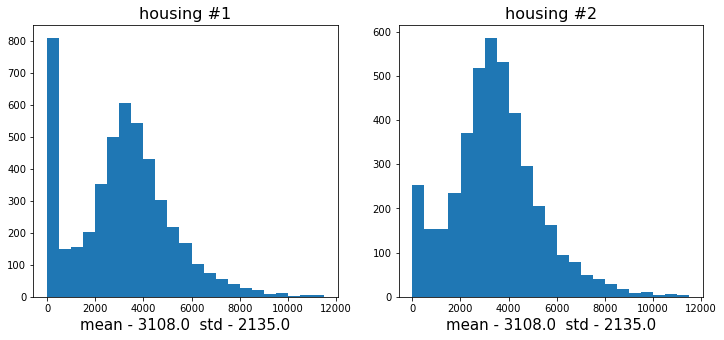

In [381]:
# housing
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.hist(df_merge_category["housing"], bins = [*range(0,12000,500)])
ax1.set_title("housing #1", fontsize=16)
label = "mean - " + str(round(df_merge_category["housing"].mean(),0)) + "  std - " + str(round(df_merge_category["housing"].std(),0))
ax1.set_xlabel(label, fontsize=15)
ax2.hist(df_merge_category["housing"], bins = [*range(1,12000,500)])
ax2.set_title("housing #2", fontsize=16)
label = "mean - " + str(round(df_merge_category["housing"].mean(),0)) + "  std - " + str(round(df_merge_category["housing"].std(),0))
ax2.set_xlabel(label, fontsize=15)

Text(0.5, 0, 'mean - 941.0  std - 967.0')

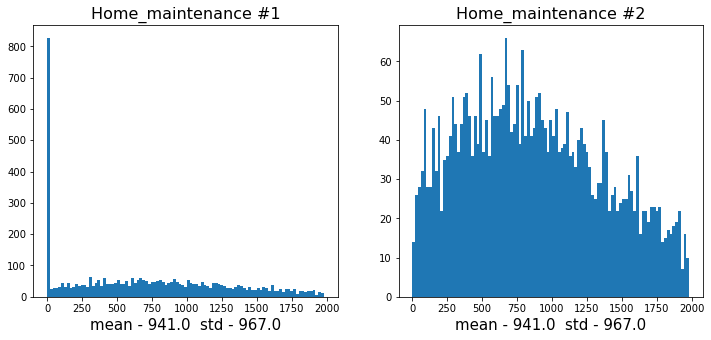

In [382]:
# Home_maintenance
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.hist(df_merge_category["Home_maintenance"], bins = [*range(0,2000,20)])
ax1.set_title("Home_maintenance #1", fontsize=16)
label = "mean - " + str(round(df_merge_category["Home_maintenance"].mean(),0)) + "  std - " + str(round(df_merge_category["Home_maintenance"].std(),0))
ax1.set_xlabel(label, fontsize=15)
ax2.hist(df_merge_category["Home_maintenance"], bins = [*range(1,2000,20)])
ax2.set_title("Home_maintenance #2", fontsize=16)
label = "mean - " + str(round(df_merge_category["Home_maintenance"].mean(),0)) + "  std - " + str(round(df_merge_category["Home_maintenance"].std(),0))
ax2.set_xlabel(label, fontsize=15)

Text(0.5, 0, 'mean - 734.0  std - 856.0')

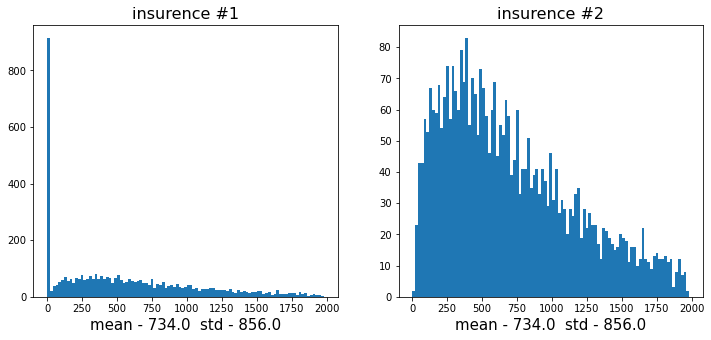

In [383]:
# insurence
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.hist(df_merge_category["insurence"], bins = [*range(0,2000,20)])
ax1.set_title("insurence #1", fontsize=16)
label = "mean - " + str(round(df_merge_category["insurence"].mean(),0)) + "  std - " + str(round(df_merge_category["insurence"].std(),0))
ax1.set_xlabel(label, fontsize=15)
ax2.hist(df_merge_category["insurence"], bins = [*range(1,2000,20)])
ax2.set_title("insurence #2", fontsize=16)
label = "mean - " + str(round(df_merge_category["insurence"].mean(),0)) + "  std - " + str(round(df_merge_category["insurence"].std(),0))
ax2.set_xlabel(label, fontsize=15)

Text(0.5, 0, 'mean - 457.0  std - 555.0')

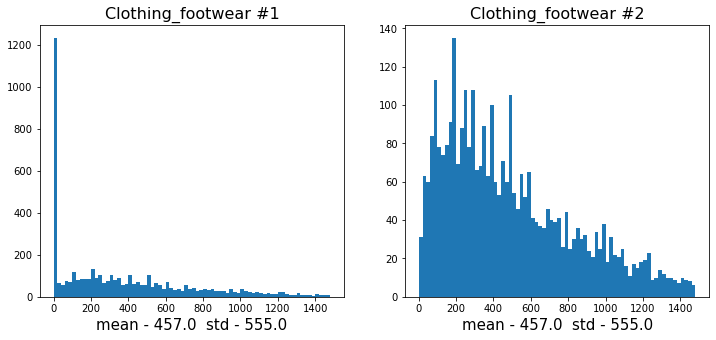

In [384]:
# Clothing_footwear
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.hist(df_merge_category["Clothing_footwear"], bins = [*range(0,1500,20)])
ax1.set_title("Clothing_footwear #1", fontsize=16)
label = "mean - " + str(round(df_merge_category["Clothing_footwear"].mean(),0)) + "  std - " + str(round(df_merge_category["Clothing_footwear"].std(),0))
ax1.set_xlabel(label, fontsize=15)
ax2.hist(df_merge_category["Clothing_footwear"], bins = [*range(1,1500,20)])
ax2.set_title("Clothing_footwear #2", fontsize=16)
label = "mean - " + str(round(df_merge_category["Clothing_footwear"].mean(),0)) + "  std - " + str(round(df_merge_category["Clothing_footwear"].std(),0))
ax2.set_xlabel(label, fontsize=15)

Text(0.5, 0, 'mean - 2363.0  std - 1495.0')

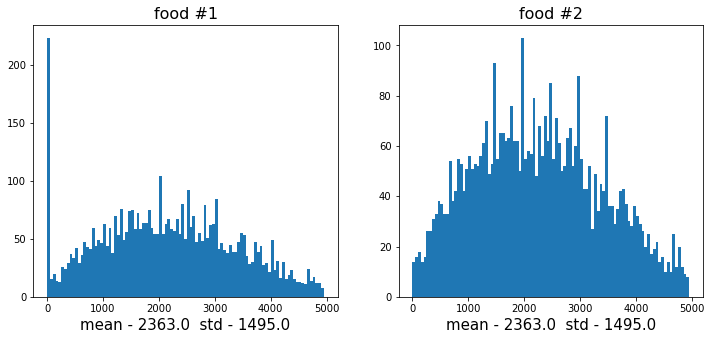

In [385]:
# food
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(12,5)
ax1.hist(df_merge_category["food"], bins = [*range(0,5000,50)])
ax1.set_title("food #1", fontsize=16)
label = "mean - " + str(round(df_merge_category["food"].mean(),0)) + "  std - " + str(round(df_merge_category["food"].std(),0))
ax1.set_xlabel(label, fontsize=15)
ax2.hist(df_merge_category["food"], bins = [*range(1,5000,50)])
ax2.set_title("food #2", fontsize=16)
label = "mean - " + str(round(df_merge_category["food"].mean(),0)) + "  std - " + str(round(df_merge_category["food"].std(),0))
ax2.set_xlabel(label, fontsize=15)

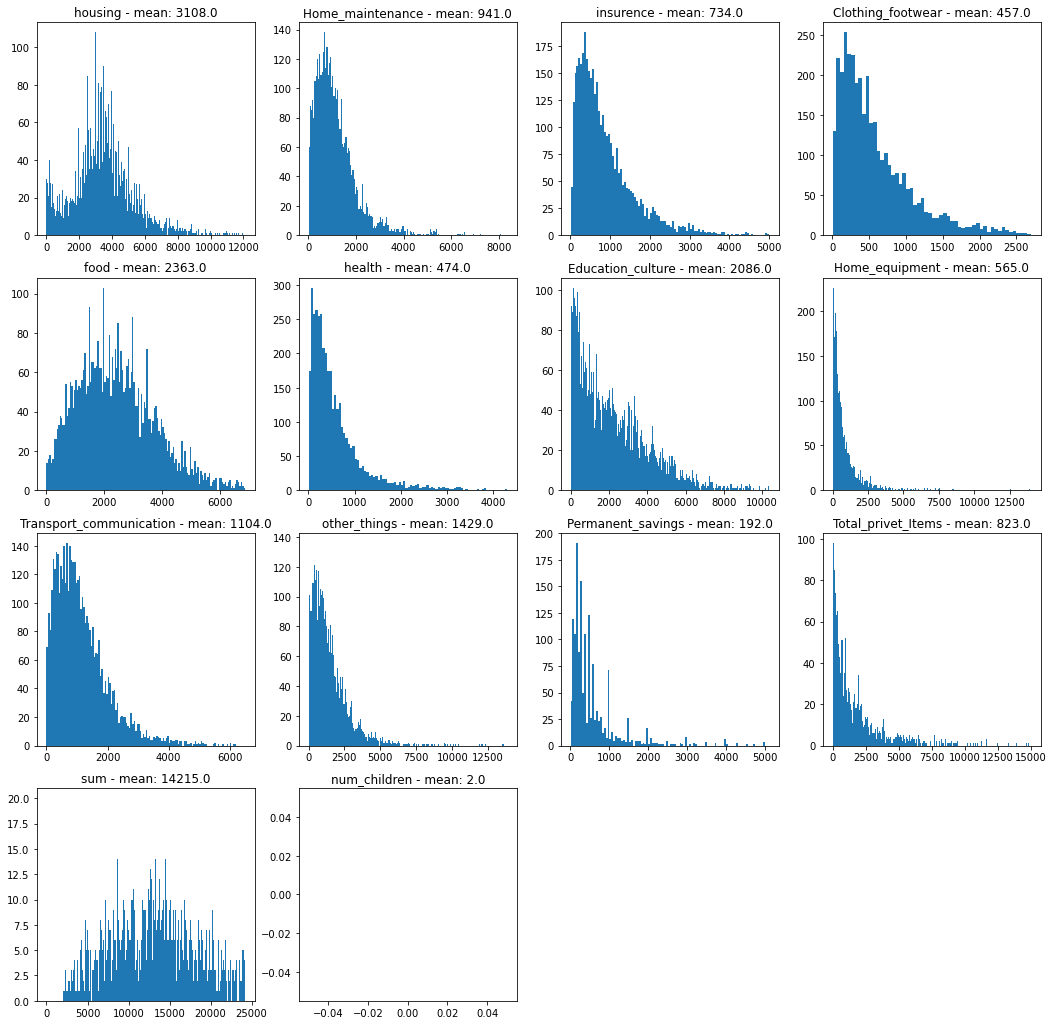

In [386]:
expenses_categoris = df_merge_category.columns[3:17]
plt.figure(figsize=(18,18))
j = 1
for cat in expenses_categoris:
    plt.subplot(4,4,j)
    max_val = int(df_merge_category[cat].max() / 2)
    plt.hist(df_merge_category[cat], bins = [*range(1,max_val,50)])
    title = cat +  " - mean: " + str(round(df_merge_category[cat].mean(), 0))
    plt.title(title) 

    j +=1
#    print("The median is - ", df_1[cat].median())
#    print("The mean is - ", df_1[cat].mean())
#   print("The std is - ", df_1[cat].std())


## Model for 2 parent + 2 childrens

In [387]:
df_2parens_2children = df_merge_category[(df_merge_category["ststus"] == 2) &  (df_merge_category["num_children"] == 2)]

In [388]:
df_2parens_2children

,id,incom,expenses,housing,Home_maintenance,insurence,Clothing_footwear,food,health,Education_culture,Home_equipment,Transport_communication,other_things,Permanent_savings,Total_privet_Items,sum,num_children,Marital_status,ststus,num_person
21,9266,18340.0,16923.0,4365.0,2963.0,1094.0,1035.0,1653.0,805.0,1434.0,88.0,1174.0,2312.0,0.0,0.0,15863.0,2.0,נשוי/אה,2,4.0
24,10474,19120.0,10643.0,581.0,246.0,1427.0,464.0,4138.0,711.0,312.0,167.0,598.0,1278.0,0.0,721.0,13955.0,2.0,נשוי/אה,2,4.0
29,11923,32067.0,21376.0,6300.0,290.0,350.0,893.0,2408.0,1187.0,4774.0,709.0,1205.0,2760.0,500.0,0.0,10400.0,2.0,נשוי/אה,2,4.0
31,12546,3579.0,6662.0,630.0,872.0,322.0,355.0,1322.0,405.0,1397.0,0.0,312.0,1047.0,0.0,0.0,9660.0,2.0,נשוי/אה,2,4.0
49,16023,38941.0,14979.0,3717.0,0.0,395.0,80.0,2833.0,662.0,438.0,2108.0,2201.0,1423.0,0.0,1122.0,14391.0,2.0,נשוי/אה,2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,80611,11762.0,12338.0,2900.0,608.0,1049.0,0.0,2000.0,288.0,0.0,0.0,2243.0,2000.0,0.0,1250.0,NaN,2.0,נשוי/אה,2,4.0
4782,80829,44051.0,22404.0,660.0,2403.0,1275.0,1650.0,5106.0,600.0,2151.0,600.0,3382.0,2450.0,0.0,2127.0,NaN,2.0,נשוי/אה,2,4.0
4786,81125,19496.0,5672.0,0.0,0.0,0.0,0.0,1015.0,0.0,2500.0,67.0,1011.0,1079.0,0.0,0.0,NaN,2.0,נשוי/אה,2,4.0
4789,81338,25443.0,28878.0,10930.0,2940.0,1053.0,600.0,4600.0,1450.0,1385.0,2500.0,2220.0,450.0,350.0,400.0,NaN,2.0,נשוי/אה,2,4.0


### Calculation - MIS, 2&2 model

In [389]:
list_1 = [*range(1,31)]
df_2parens_2children["incom_cut"] = pd.cut(df_2parens_2children["incom"], bins= 30 ,labels = list_1)


mis = 0
list_cat = df_2parens_2children.columns[3:15]
j = 1
for cat in list_cat:
    df_n = df_2parens_2children.groupby("incom_cut").mean()[cat]
    df_n
    dic_1 = {}
    for i in range(1,25):
        x = abs(df_n[i+1]-df_n[i])
        dic_1[i] = x
    min_x =  min(dic_1, key=dic_1.get)
    print(j,".",  cat, ", incum per capita group - ",min_x,", minimal expenses - " ,df_n[min_x])
    j += 1
    mis += df_n[min_x]
    
print("the threshold of minimal incom is - ", mis)
print("% under the threshold - ", df_2parens_2children[df_2parens_2children["incom"] < mis].count()["id"] / df_2parens_2children.count()["id"])

1 . housing , incum per capita group -  9 , minimal expenses -  3087.4117647058824
2 . Home_maintenance , incum per capita group -  7 , minimal expenses -  816.0322580645161
3 . insurence , incum per capita group -  13 , minimal expenses -  1059.24
4 . Clothing_footwear , incum per capita group -  4 , minimal expenses -  357.39285714285717
5 . food , incum per capita group -  2 , minimal expenses -  1318.6923076923076
6 . health , incum per capita group -  7 , minimal expenses -  394.0752688172043
7 . Education_culture , incum per capita group -  2 , minimal expenses -  1476.076923076923
8 . Home_equipment , incum per capita group -  3 , minimal expenses -  388.2
9 . Transport_communication , incum per capita group -  14 , minimal expenses -  1615.3333333333333
10 . other_things , incum per capita group -  7 , minimal expenses -  1347.3978494623657
11 . Permanent_savings , incum per capita group -  23 , minimal expenses -  450.0
12 . Total_privet_Items , incum per capita group -  11 , 

C:\Users\user\AppData\Local\Temp/ipykernel_3200/131142668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2parens_2children["incom_cut"] = pd.cut(df_2parens_2children["incom"], bins= 30 ,labels = list_1)


### Standardize per capita

In [390]:
# df["ststus"] = df['Marital_status'].apply(lambda x: 2 if x == "נשוי/אה" or x == "זוגיות" else 1)
# df["num_person"] =  df["ststus"] + df["Num_children"]

### standart num of person - israel method, OECD method

In [391]:
# df["standart_num_person"] = df["num_person"].replace({1: 1.25, 2: 2, 3: 2.65, 4: 3.20, 5: 3.75, 6: 4.25, 7: 4.75, 8: 5.2, 9: 5.6})
# df["standart_num_person_oecd"] = df["num_person"].apply(lambda x : x**2)

### Regulations of expenses and income per standard person

In [392]:
df_standart_category = pd.DataFrame()
df_standart_category = df_merge_category
df_standart_category["standart_num_person"] = df_standart_category["num_person"].replace({1: 1.25, 2: 2, 3: 2.65, 4: 3.20, 5: 3.75, 6: 4.25, 7: 4.75, 8: 5.2, 9: 5.6})
list_1 = df_standart_category.columns[1:15]
for i in list_1:
    df_standart_category[i] = df_standart_category[i] / df_standart_category["standart_num_person"]

In [393]:
 df_standart_category

,id,incom,expenses,housing,Home_maintenance,insurence,Clothing_footwear,food,health,Education_culture,...,Transport_communication,other_things,Permanent_savings,Total_privet_Items,sum,num_children,Marital_status,ststus,num_person,standart_num_person
0,158,8405.333333,4972.800000,1040.000000,221.600000,0.000000,29.333333,878.933333,10.133333,444.266667,...,1023.733333,98.666667,0.000000,1226.133333,18648.0,3.0,נשוי/אה,2,5.0,3.75
1,1581,5638.736842,5443.368421,176.842105,438.315789,187.789474,232.000000,1102.526316,294.736842,1076.000000,...,666.105263,414.105263,0.000000,749.052632,25856.0,5.0,נשוי/אה,2,7.0,4.75
2,2548,4001.647059,2593.176471,470.588235,490.588235,52.235294,58.823529,549.411765,171.058824,75.764706,...,27.764706,696.941176,0.000000,0.000000,13530.0,4.0,נשוי/אה,2,6.0,4.25
3,2624,4968.125000,4228.125000,694.375000,615.000000,195.625000,209.375000,734.375000,178.125000,642.812500,...,195.625000,511.250000,78.125000,4.687500,9839.0,3.0,גרוש/ה,1,4.0,3.20
4,2671,3334.933333,2623.733333,18.666667,85.333333,312.000000,224.000000,478.933333,244.266667,297.333333,...,354.933333,113.600000,0.000000,184.266667,16859.0,4.0,גרוש/ה,1,5.0,3.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,82636,4760.000000,1636.500000,0.000000,205.500000,219.000000,175.000000,5.000000,73.500000,275.000000,...,368.500000,315.000000,0.000000,0.000000,NaN,1.0,גרוש/ה,1,2.0,2.00
4802,82852,2167.600000,2546.100000,484.100000,515.000000,0.000000,0.000000,712.200000,117.700000,81.000000,...,206.000000,350.100000,0.000000,80.000000,NaN,8.0,נשוי/אה,2,10.0,10.00
4803,83171,7616.981132,3095.094340,2716.981132,0.000000,0.000000,0.000000,26.415094,0.000000,0.000000,...,0.000000,0.000000,0.000000,351.698113,NaN,2.0,פרוד/ה,1,3.0,2.65
4804,83807,2239.529412,2756.705882,819.058824,6.588235,243.058824,99.764706,417.176471,764.705882,16.000000,...,68.235294,145.647059,35.294118,0.000000,NaN,4.0,נשוי/אה,2,6.0,4.25


In [394]:
#df_1["incom"] = df_1["incom"] / df["standart_num_person"]
#df_1["expenses"] = df_1["expenses"] / df["standart_num_person"]
#df_chack = pd.DataFrame(df[["ststus","Num_children", "num_person", "standart_num_person", "incom"]])
#df_chack["incom_per_capita"] = df_1["incom"]
#df_chack

## Descriptive statistics

### hist of incom and expenses

mean 5554.911008221113
median 5146.0
std 2662.89270321416


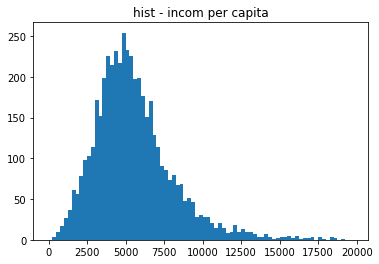

In [395]:
plt.hist(df_standart_category["incom"], bins = [*range(0,20000,250)])
plt.title("hist - incom per capita")
print("mean", df_standart_category["incom"].mean())
print("median", df_standart_category["incom"].median())
print("std", df_standart_category["incom"].std())

mean 4584.912096399114
std 2259.8146207313002


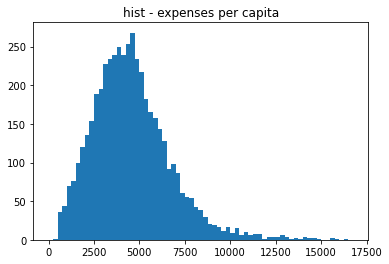

In [396]:
plt.hist(df_standart_category["expenses"], bins = [*range(0,17000,250)])
plt.title("hist - expenses per capita")
print("mean", df_standart_category["expenses"].mean())
print("std", df_standart_category["expenses"].std())

### incum cut to 30 groups

In [397]:
list = df_standart_category[ (df.incom > 23000) | (df.expenses > 23000) ].index
df_standart_category = df_standart_category.drop(list)
list_1 = [*range(1,31)]
df_standart_category["incom_cut"] = pd.cut(df_standart_category["incom"], bins= 30 ,labels = list_1)

In [398]:
df_incom = pd.DataFrame()
df_incom["min"] = df_standart_category.groupby("incom_cut").min()["incom"]
df_incom["max"] = df_standart_category.groupby("incom_cut").max()["incom"]
df_incom["mean"] = df_standart_category.groupby("incom_cut").mean()["incom"]
df_incom

,min,max,mean
incom_cut,,,
1,384.615385,975.535714,736.112720
2,1000.000000,1576.875000,1322.654973
3,1578.125000,2167.200000,1895.714703
4,2180.000000,2764.150943,2488.683214
5,2770.000000,3365.178571,3094.561303
6,3366.875000,3961.509434,3686.286066
7,3962.264151,4554.666667,4260.183365
8,4560.000000,5153.600000,4852.305069
9,5156.800000,5747.466667,5429.143974


### plots

### df under group 17

In [402]:
df_incom_17 = df_standart_category[df_standart_category["incom_cut"] < 17]
df_incom_17

,id,incom,expenses,housing,Home_maintenance,insurence,Clothing_footwear,food,health,Education_culture,...,other_things,Permanent_savings,Total_privet_Items,sum,num_children,Marital_status,ststus,num_person,standart_num_person,incom_cut
2,2548,4001.647059,2593.176471,470.588235,490.588235,52.235294,58.823529,549.411765,171.058824,75.764706,...,696.941176,0.000000,0.000000,13530.0,4.0,נשוי/אה,2,6.0,4.25,7
3,2624,4968.125000,4228.125000,694.375000,615.000000,195.625000,209.375000,734.375000,178.125000,642.812500,...,511.250000,78.125000,4.687500,9839.0,3.0,גרוש/ה,1,4.0,3.20,8
4,2671,3334.933333,2623.733333,18.666667,85.333333,312.000000,224.000000,478.933333,244.266667,297.333333,...,113.600000,0.000000,184.266667,16859.0,4.0,גרוש/ה,1,5.0,3.75,5
5,2778,3368.941176,3966.823529,705.882353,219.529412,292.235294,216.000000,897.882353,101.647059,12.941176,...,492.705882,0.000000,506.117647,7134.0,4.0,נשוי/אה,2,6.0,4.25,6
7,3605,8795.500000,5777.000000,1349.500000,864.000000,260.500000,80.000000,802.500000,427.000000,221.000000,...,1605.000000,0.000000,0.000000,17982.0,0.0,נשוי/אה,2,2.0,2.00,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,82288,8078.490566,3073.584906,132.075472,982.264151,0.000000,0.000000,803.773585,204.528302,484.528302,...,258.113208,0.000000,0.000000,NaN,1.0,נשוי/אה,2,3.0,2.65,13
4801,82636,4760.000000,1636.500000,0.000000,205.500000,219.000000,175.000000,5.000000,73.500000,275.000000,...,315.000000,0.000000,0.000000,NaN,1.0,גרוש/ה,1,2.0,2.00,8
4803,83171,7616.981132,3095.094340,2716.981132,0.000000,0.000000,0.000000,26.415094,0.000000,0.000000,...,0.000000,0.000000,351.698113,NaN,2.0,פרוד/ה,1,3.0,2.65,13
4804,83807,2239.529412,2756.705882,819.058824,6.588235,243.058824,99.764706,417.176471,764.705882,16.000000,...,145.647059,35.294118,0.000000,NaN,4.0,נשוי/אה,2,6.0,4.25,4


## mis calculation

In [403]:
mis = 0
list_cat = df_incom_17.columns[3:15]
for cat in list_cat:
    df_n = df_incom_17.groupby("incom_cut").mean()[cat]
    df_n
    dic_1 = {}
    for i in range(1,25):
        x = abs(df_n[i+1]-df_n[i])
        dic_1[i] = x
    min_x =  min(dic_1, key=dic_1.get)
    print( cat, ", incum per capita group - ",min_x,", minimal expenses - " ,df_n[min_x])
    mis += df_n[min_x]

housing , incum per capita group -  2 , minimal expenses -  556.8467287003825
Home_maintenance , incum per capita group -  12 , minimal expenses -  358.569129347579
insurence , incum per capita group -  9 , minimal expenses -  268.7652050442819
Clothing_footwear , incum per capita group -  10 , minimal expenses -  172.65187708673034
food , incum per capita group -  6 , minimal expenses -  686.8636380434406
health , incum per capita group -  12 , minimal expenses -  186.83259831779952
Education_culture , incum per capita group -  13 , minimal expenses -  604.1165094339623
Home_equipment , incum per capita group -  10 , minimal expenses -  231.44837817377123
Transport_communication , incum per capita group -  11 , minimal expenses -  419.9224318658281
other_things , incum per capita group -  1 , minimal expenses -  206.85996430552444
Permanent_savings , incum per capita group -  1 , minimal expenses -  16.077197031651878
Total_privet_Items , incum per capita group -  6 , minimal expenses

In [404]:
print("the threshold of minimal incom is - ", mis)

the threshold of minimal incom is -  3892.843568776115


In [406]:
print("% under the threshold - ", df_standart_category[df_standart_category["incom"] < mis].count()["id"] / df_standart_category.count()["id"])

% under the threshold -  0.3218816067653277


Text(0, 0.5, 'Average expenditure on Education_culture ')

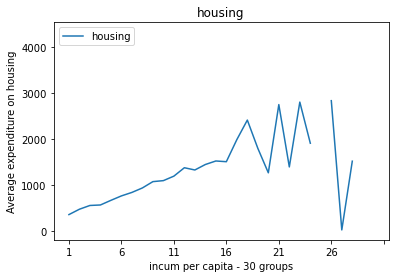

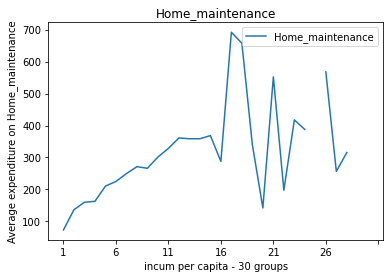

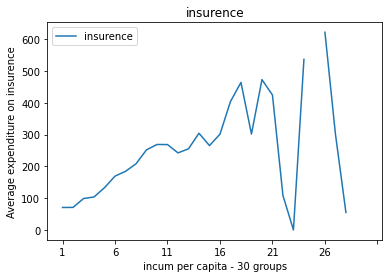

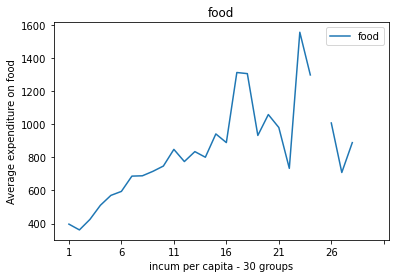

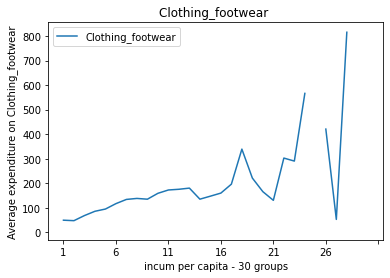

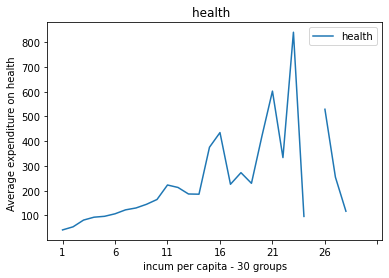

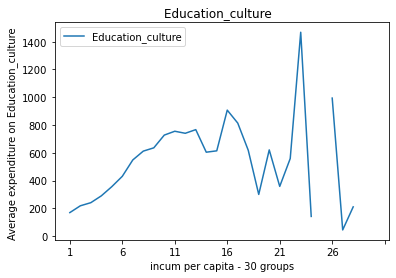

In [411]:
# housing
df_housing = df_standart_category[["incom_cut", "housing"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("housing")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on housing")
 
# Home_maintenance
df_housing = df_standart_category[["incom_cut", "Home_maintenance"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("Home_maintenance")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on Home_maintenance")

# insurence
df_housing = df_standart_category[["incom_cut", "insurence"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("insurence")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on insurence")

# food
df_housing = df_standart_category[["incom_cut", "food"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("food")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on food")

# Clothing_footwear 
df_housing = df_standart_category[["incom_cut", "Clothing_footwear"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("Clothing_footwear ")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on Clothing_footwear")


# health  
df_housing = df_standart_category[["incom_cut", "health"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("health  ")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on health ")


# Education_culture  
df_housing = df_standart_category[["incom_cut", "Education_culture"]]
df_housing.groupby("incom_cut").mean().plot()
plt.title("Education_culture  ")
plt.xlabel("incum per capita - 30 groups")
plt.ylabel("Average expenditure on Education_culture ")



### The poverty line is half of the median

In [105]:
med = df_1["incom"].median()
print("% under the threshold - ", df_1[df_1["incom"] < med/2 ].count()["id"] / df.count()["id"])

% under the threshold -  0.08528620822128313
